In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%config inlineBackend.figure_format = 'retina'

**Spatial Aggregation**

In [3]:
#question 1 
csv_file = "Data.csv"
df = pd.read_csv(csv_file)
df = df.dropna(subset=['PM2.5'])
avg_pm25 = df.groupby('state')['PM2.5'].mean()
highest_state = avg_pm25.idxmax()
highest_value = avg_pm25.max()
print(f"state with highest average PM2.5 concentration: {highest_state} ({highest_value:.2f} µg/m³)")

state with highest average PM2.5 concentration: Delhi (104.10 µg/m³)


In [4]:
#question 2 
csv_file = "Data.csv"
df = pd.read_csv(csv_file)
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df_2023 = df[df['Timestamp'].dt.year == 2023]
df_2023 = df_2023.dropna(subset=['PM2.5'])
hazardous_days = df_2023[df_2023['PM2.5'] > 300].groupby('state')['Timestamp'].nunique()
most_hazardous_state = hazardous_days.idxmax()
most_hazardous_days = hazardous_days.max()
print(f"state with the most hazardous PM2.5 days in 2023: {most_hazardous_state} ({most_hazardous_days} days)")

state with the most hazardous PM2.5 days in 2023: Delhi (49 days)


In [5]:
#question 3 
csv_file = "Data.csv"
df = pd.read_csv(csv_file)

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df_2023 = df[df['Timestamp'].dt.year == 2023]
df_2023 = df_2023.dropna(subset=['PM2.5'])

state_variability = df_2023.groupby('state')['PM2.5'].std()
most_variable_state = state_variability.idxmax()
highest_variability = state_variability.max()

print(f"state with highest PM2.5 variability in 2023: {most_variable_state} ({highest_variability:.2f})")


state with highest PM2.5 variability in 2023: Delhi (82.80)


In [6]:
#question 4
import pandas as pd

csv_file = "Data.csv"
df = pd.read_csv(csv_file)

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df_covid = df[(df['Timestamp'].dt.year >= 2020) & (df['Timestamp'].dt.year <= 2021)]
df_covid = df_covid.dropna(subset=['PM2.5'])

state_avg_pm25 = df_covid.groupby('state')['PM2.5'].mean()
lowest_state = state_avg_pm25.idxmin()
lowest_value = state_avg_pm25.min()

print(f"state with lowest PM2.5 levels during covid period: {lowest_state} ({lowest_value:.2f})")

state with lowest PM2.5 levels during covid period: Mizoram (14.32)


**Temporal Aggregation**

In [7]:
#question 1
csv_file = "Data.csv"
df = pd.read_csv(csv_file)

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df_aug_2020 = df[(df['Timestamp'].dt.year == 2020) & (df['Timestamp'].dt.month == 8)]
df_aug_2020 = df_aug_2020.dropna(subset=['PM2.5'])

highest_station = df_aug_2020.loc[df_aug_2020['PM2.5'].idxmax(), 'station']
highest_value = df_aug_2020['PM2.5'].max()

print(f"station with highest PM2.5 in aug 2020: {highest_station} ({highest_value:.2f})")

station with highest PM2.5 in aug 2020: Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB (805.51)


In [8]:
#question 2
csv_file = "Data.csv"
df = pd.read_csv(csv_file)
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df_2018 = df[(df['Timestamp'].dt.year == 2018) & (df['station'].isin(["Lal Bahadur Shastri Nagar", "Kalaburagi - KSPCB"]))]
df_2018 = df_2018.dropna(subset=['PM2.5'])

winter = df_2018[df_2018['Timestamp'].dt.month.isin([12, 1, 2])]['PM2.5'].mean()
summer = df_2018[df_2018['Timestamp'].dt.month.isin([3, 4, 5])]['PM2.5'].mean()
monsoon = df_2018[df_2018['Timestamp'].dt.month.isin([6, 7, 8, 9])]['PM2.5'].mean()

seasonal_avg = {"winter": winter, "summer": summer, "monsoon": monsoon}
highest_season = max(seasonal_avg, key=seasonal_avg.get)

print(f"season with highest PM2.5 in 2018: {highest_season} ({seasonal_avg[highest_season]:.2f})")
#heating traps green house gases which increase pollution  

season with highest PM2.5 in 2018: winter (nan)


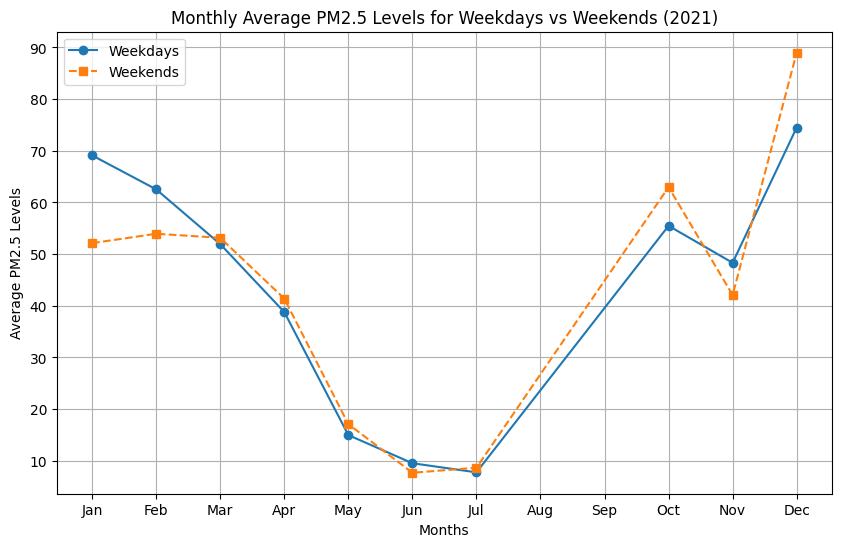

In [ ]:
#question 3
csv_file = "Data.csv"
df = pd.read_csv(csv_file)
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df_2021 = df[(df['Timestamp'].dt.year == 2021) & (df['station'] == "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB")]
df_2021 = df_2021.dropna(subset=['PM2.5'])
df_2021['weekday'] = df_2021['Timestamp'].dt.weekday
df_2021['month'] = df_2021['Timestamp'].dt.month
weekdays_avg = df_2021[df_2021['weekday'] < 5].groupby('month')['PM2.5'].mean()
weekends_avg = df_2021[df_2021['weekday'] >= 5].groupby('month')['PM2.5'].mean()
plt.figure(figsize=(10, 5))
plt.plot(weekdays_avg.index, weekdays_avg.values, marker='o', label='Weekdays', linestyle='-')
plt.plot(weekends_avg.index, weekends_avg.values, marker='s', label='Weekends', linestyle='--')
plt.xlabel("Months")
plt.ylabel("Average PM2.5 Levels")
plt.title("Monthly Average PM2.5 Levels for Weekdays vs Weekends (2021)")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend()
plt.grid()
plt.show()

**Spatio-Temporal Aggregation**

In [10]:
#question 1
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df_2022 = df[df['Timestamp'].dt.year == 2022]
df_2022 = df_2022.dropna(subset=['PM2.5'])

summer_avg = df_2022[df_2022['Timestamp'].dt.month.isin([3, 4, 5])].groupby('state')['PM2.5'].mean()
monsoon_avg = df_2022[df_2022['Timestamp'].dt.month.isin([6, 7, 8, 9])].groupby('state')['PM2.5'].mean()

percentage_change = ((monsoon_avg - summer_avg) / summer_avg) * 100
greatest_change_state = percentage_change.abs().idxmax()
greatest_change_value = percentage_change[greatest_change_state]

print(f"state with most change in PM2.5 from summer to monsoon in 2022: {greatest_change_state} ({greatest_change_value:.2f}%)")

state with most change in PM2.5 from summer to monsoon in 2022: Assam (-61.18%)


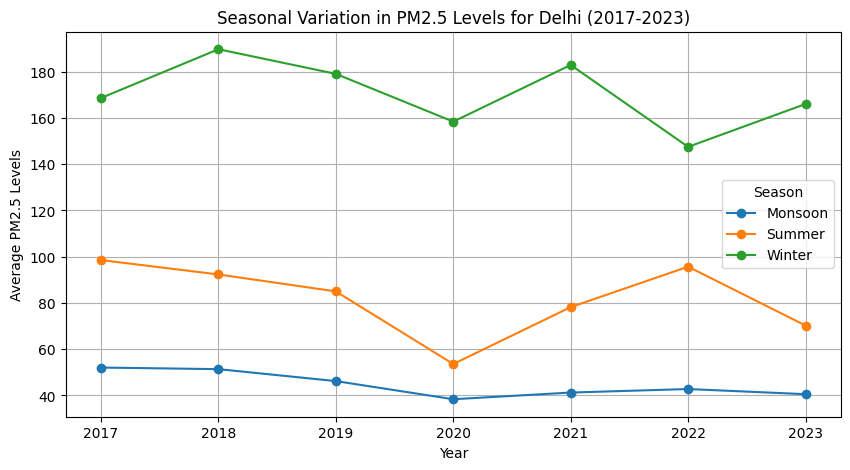

In [11]:
#question 2
df_delhi = df[(df['state'] == "Delhi") & (df['Timestamp'].dt.year.between(2017, 2023))]
df_delhi = df_delhi.dropna(subset=['PM2.5'])

df_delhi['season'] = df_delhi['Timestamp'].dt.month.map(lambda m: 'Winter' if m in [12, 1, 2] else ('Summer' if m in [3, 4, 5] else ('Monsoon' if m in [6, 7, 8, 9] else 'Other')))
df_delhi = df_delhi[df_delhi['season'] != 'Other']

seasonal_avg = df_delhi.groupby(['season', df_delhi['Timestamp'].dt.year])['PM2.5'].mean().unstack()

seasonal_avg.T.plot(kind='line', figsize=(10, 5), marker='o')
plt.xlabel("Year")
plt.ylabel("Average PM2.5 Levels")
plt.title("Seasonal Variation in PM2.5 Levels for Delhi (2017-2023)")
plt.legend(title="Season")
plt.grid()
plt.show()

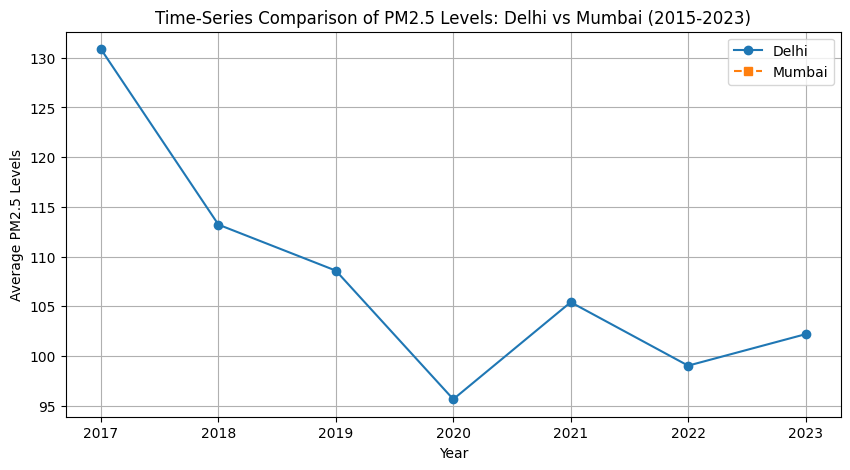

city with most fluctuations in PM2.5: Mumbai


In [12]:
#question 3
df_delhi = df[(df['state'] == "Delhi") & (df['Timestamp'].dt.year.between(2015, 2023))]
df_mumbai = df[(df['state'] == "Mumbai") & (df['Timestamp'].dt.year.between(2015, 2023))]

df_delhi = df_delhi.dropna(subset=['PM2.5'])
df_mumbai = df_mumbai.dropna(subset=['PM2.5'])

df_delhi = df_delhi.groupby(df_delhi['Timestamp'].dt.year)['PM2.5'].mean()
df_mumbai = df_mumbai.groupby(df_mumbai['Timestamp'].dt.year)['PM2.5'].mean()

plt.figure(figsize=(10, 5))
plt.plot(df_delhi.index, df_delhi.values, marker='o', label='Delhi', linestyle='-')
plt.plot(df_mumbai.index, df_mumbai.values, marker='s', label='Mumbai', linestyle='--')
plt.xlabel("Year")
plt.ylabel("Average PM2.5 Levels")
plt.title("Time-Series Comparison of PM2.5 Levels: Delhi vs Mumbai (2015-2023)")
plt.legend()
plt.grid()
plt.show()

delhi_variability = df_delhi.std()
mumbai_variability = df_mumbai.std()

most_fluctuations = "Delhi" if delhi_variability > mumbai_variability else "Mumbai"
print(f"city with most fluctuations in PM2.5: {most_fluctuations}")

**Population-Based**

In [13]:
#question 1
df_station_count = df.groupby('state')['station'].nunique()
state_data = pd.read_csv("State_data.csv")
df_population = state_data[['State', 'Population']].drop_duplicates().set_index('State')

df_ratio = (df_station_count / df_population['Population']) * 1e6  # Stations per million people
highest_ratio_state = df_ratio.idxmax()
highest_ratio_value = df_ratio.max()

print(f"state with highest monitoring stations relative to population: {highest_ratio_state} ({highest_ratio_value:.2f} per million)")

state with highest monitoring stations relative to population: Chandigarh (2.84 per million)


state with highest monitoring stations relative to population: Chandigarh (2.84 per million)


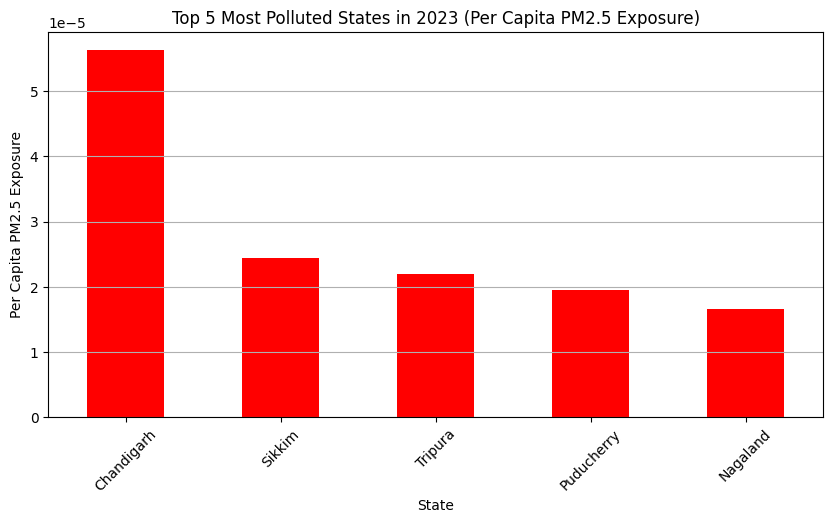

In [14]:
#question 2
df_station_count = df.groupby('state')['station'].nunique()
state_data = pd.read_csv("State_data.csv")
df_population = state_data[['State', 'Population']].drop_duplicates().set_index('State')

df_ratio = (df_station_count / df_population['Population']) * 1e6  # Stations per million people
highest_ratio_state = df_ratio.idxmax()
highest_ratio_value = df_ratio.max()

print(f"state with highest monitoring stations relative to population: {highest_ratio_state} ({highest_ratio_value:.2f} per million)")

df_2023 = df[df['Timestamp'].dt.year == 2023]
df_state_pm25 = df_2023.groupby('state')['PM2.5'].mean()
df_per_capita_pm25 = df_state_pm25 / df_population['Population']

top_5_polluted_states = df_per_capita_pm25.nlargest(5)

plt.figure(figsize=(10, 5))
top_5_polluted_states.plot(kind='bar', color='red')
plt.xlabel("State")
plt.ylabel("Per Capita PM2.5 Exposure")
plt.title("Top 5 Most Polluted States in 2023 (Per Capita PM2.5 Exposure)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

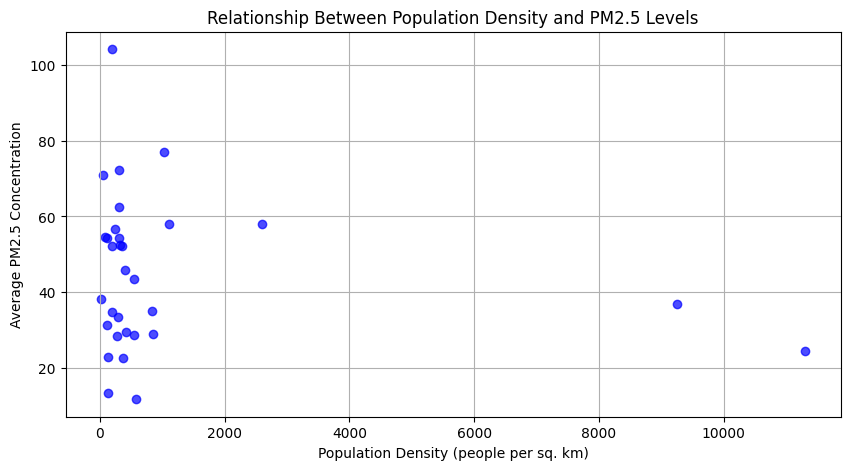

correlation between population density and pm2.5 levels: 0.51


In [15]:
#question 3
state_data = pd.read_csv("State_data.csv")
state_data['Population Density'] = state_data['Population'] / state_data['Area (km2)']
df_population = state_data[['State', 'Population Density']].drop_duplicates().set_index('State')

df_state_pm25 = df.groupby('state')['PM2.5'].mean()

plt.figure(figsize=(10, 5))
plt.scatter(df_population['Population Density'], df_state_pm25, color='blue', alpha=0.7)
plt.xlabel("Population Density (people per sq. km)")
plt.ylabel("Average PM2.5 Concentration")
plt.title("Relationship Between Population Density and PM2.5 Levels")
plt.grid()
plt.show()

correlation = df_population['Population Density'].corr(df_state_pm25)
print(f"correlation between population density and pm2.5 levels: {correlation:.2f}")

**Area-Based**

state with highest pm2.5 concentration per square kilometer: Chandigarh (0.50 per sq km)


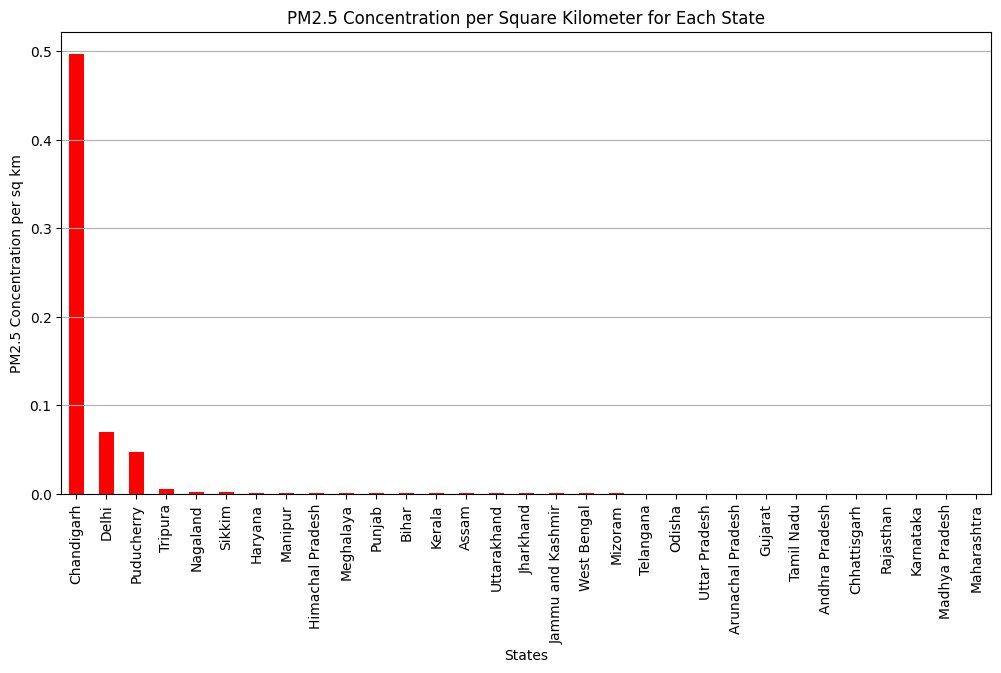

In [16]:
#question 1
state_data = pd.read_csv("State_data.csv")

df_state_pm25 = df.groupby('state', as_index=False)['PM2.5'].mean()

state_data = state_data.merge(df_state_pm25, left_on='State', right_on='state', how='left')

state_data['PM2.5 per sq km'] = state_data['PM2.5'] / state_data['Area (km2)']

df_pollution_density = state_data[['State', 'PM2.5 per sq km']].set_index('State')

highest_pm25_state = df_pollution_density['PM2.5 per sq km'].idxmax()
highest_pm25_value = df_pollution_density['PM2.5 per sq km'].max()

print(f"state with highest pm2.5 concentration per square kilometer: {highest_pm25_state} ({highest_pm25_value:.2f} per sq km)")

plt.figure(figsize=(12, 6))
df_pollution_density['PM2.5 per sq km'].dropna().sort_values(ascending=False).plot(kind='bar', color='red')
plt.xlabel("States")
plt.ylabel("PM2.5 Concentration per sq km")
plt.title("PM2.5 Concentration per Square Kilometer for Each State")
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

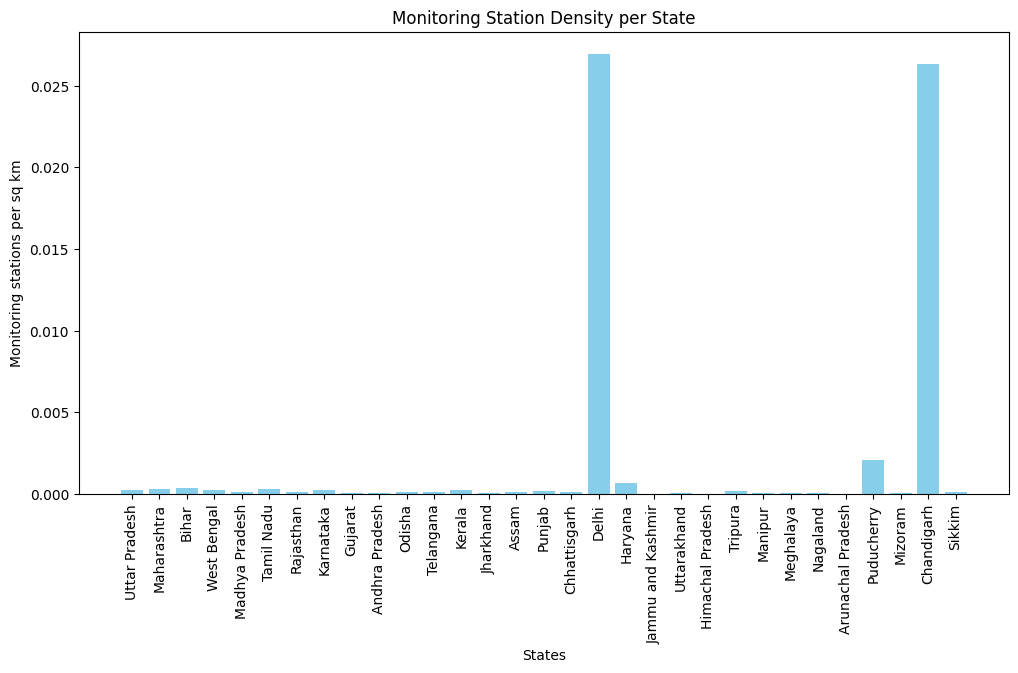

state with highest monitoring station density: Delhi


In [17]:
#question 2
state_data = pd.read_csv('State_data.csv')
data = pd.read_csv('Data.csv')
state_data.columns = state_data.columns.str.strip().str.lower()
data.columns = data.columns.str.strip().str.lower()
df_station_count = data.groupby('state', as_index=False)['station'].nunique()
state_data = state_data.merge(df_station_count, on='state', how='left').fillna({'station': 0})
state_data['stations_per_sq_km'] = state_data['station'] / state_data['area (km2)']
plt.figure(figsize=(12, 6))
plt.bar(state_data['state'], state_data['stations_per_sq_km'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel("States")
plt.ylabel("Monitoring stations per sq km")
plt.title("Monitoring Station Density per State")
plt.show()
highest_density_state = state_data.loc[state_data['stations_per_sq_km'].idxmax(), 'state']
print(f"state with highest monitoring station density: {highest_density_state}")

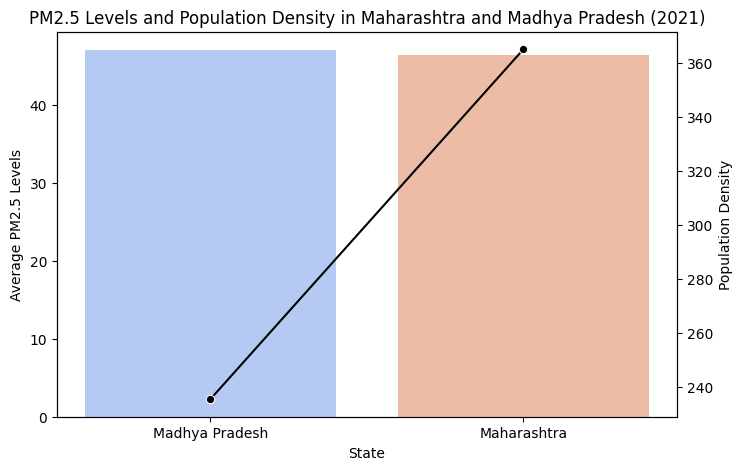

            state      PM2.5  Population Density
0  Madhya Pradesh  47.095952          235.608557
1     Maharashtra  46.440044          365.192023


In [18]:
#question 3
data_path = "Data.csv"
state_data_path = "State_data.csv"

data = pd.read_csv(data_path)
state_data = pd.read_csv(state_data_path)

data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')

data_2021 = data[(data['Timestamp'].dt.year == 2021) & data['state'].isin(['Maharashtra', 'Madhya Pradesh'])]

pm25_avg = data_2021.groupby('state')['PM2.5'].mean().reset_index()

state_info = state_data[state_data['State'].isin(['Maharashtra', 'Madhya Pradesh'])]
state_info['Population Density'] = state_info['Population'] / state_info['Area (km2)']

comparison = pm25_avg.merge(state_info, left_on='state', right_on='State', how='left')

fig, ax1 = plt.subplots(figsize=(8,5))
ax2 = ax1.twinx()

sns.barplot(x='state', y='PM2.5', data=comparison, palette='coolwarm', ax=ax1)
sns.lineplot(x='state', y='Population Density', data=comparison, marker='o', color='black', ax=ax2)

ax1.set_xlabel("State")
ax1.set_ylabel("Average PM2.5 Levels", color='black')
ax2.set_ylabel("Population Density", color='black')
ax1.set_title("PM2.5 Levels and Population Density in Maharashtra and Madhya Pradesh (2021)")

plt.show()

print(comparison[['state', 'PM2.5', 'Population Density']])

**Funding-Based**

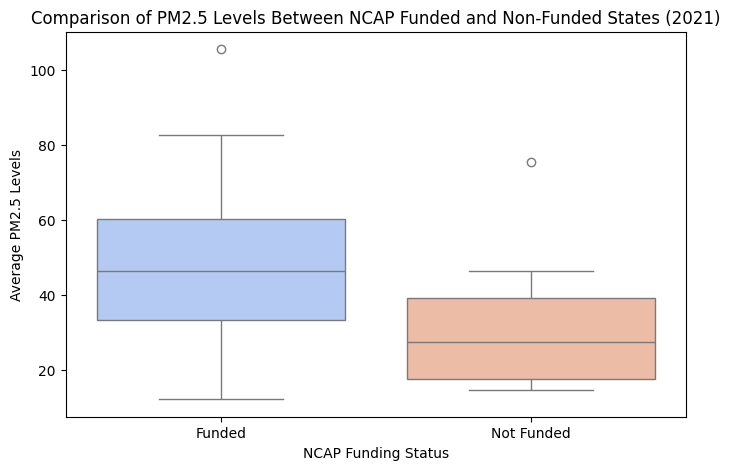

  NCAP_Funded      PM2.5
0      Funded  48.938561
1  Not Funded  32.951713


In [19]:
#question 1
ncap_funding_path = "NCAP_Funding.csv"
ncap_funding = pd.read_csv(ncap_funding_path)

data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')

data_2021 = data[data['Timestamp'].dt.year == 2021]

pm25_avg = data_2021.groupby('state')['PM2.5'].mean().reset_index()

ncap_states = ncap_funding['State'].unique()
pm25_avg['NCAP_Funded'] = pm25_avg['state'].apply(lambda x: 'Funded' if x in ncap_states else 'Not Funded')

fig, ax = plt.subplots(figsize=(8,5))
sns.boxplot(x='NCAP_Funded', y='PM2.5', data=pm25_avg, palette='coolwarm', ax=ax)
ax.set_xlabel("NCAP Funding Status")
ax.set_ylabel("Average PM2.5 Levels")
ax.set_title("Comparison of PM2.5 Levels Between NCAP Funded and Non-Funded States (2021)")
plt.show()

print(pm25_avg.groupby('NCAP_Funded')['PM2.5'].mean().reset_index())

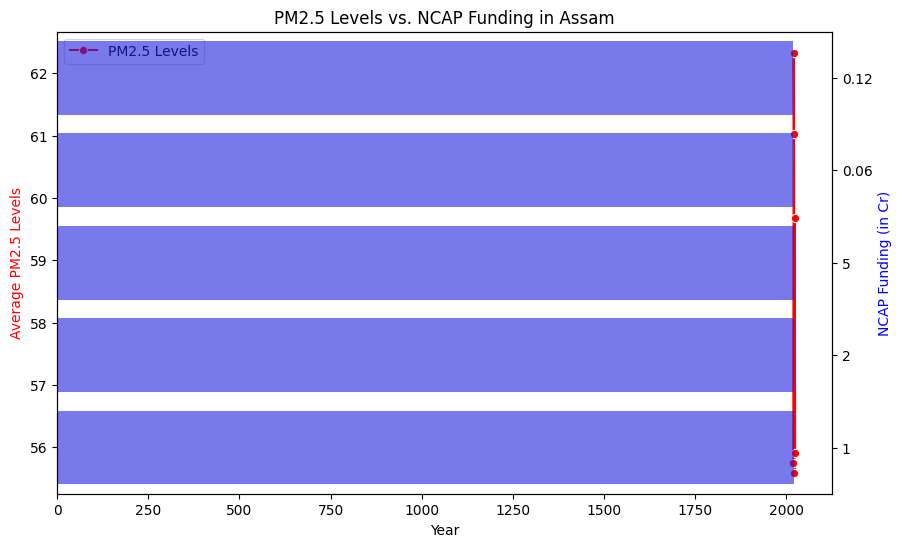

In [20]:
#question 2
data_path = "Data.csv"
state_data_path = "State_data.csv"
ncap_funding_path = "NCAP_Funding.csv"

data = pd.read_csv(data_path)
state_data = pd.read_csv(state_data_path)
ncap_funding = pd.read_csv(ncap_funding_path)

data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')
data['Year'] = data['Timestamp'].dt.year

data_assam = data[(data['state'] == 'Assam') & data['Year'].notna()]
data_assam_avg = data_assam.groupby('Year')['PM2.5'].mean().reset_index()

ncap_assam = ncap_funding[ncap_funding['State'] == 'Assam']
ncap_assam = ncap_assam[['State', 'Amount released during FY 2019-20', 'Amount released during FY 2020-21']]
ncap_assam = ncap_assam.melt(id_vars=['State'], var_name='Year', value_name='Total fund released')
ncap_assam['Year'] = ncap_assam['Year'].str.extract(r'(\d{4})').astype(float)

fig, ax1 = plt.subplots(figsize=(10,6))
ax2 = ax1.twinx()

sns.lineplot(x='Year', y='PM2.5', data=data_assam_avg, marker='o', color='red', ax=ax1, label='PM2.5 Levels')
sns.barplot(x='Year', y='Total fund released', data=ncap_assam, alpha=0.6, color='blue', ax=ax2)

ax1.set_xlabel("Year")
ax1.set_ylabel("Average PM2.5 Levels", color='red')
ax2.set_ylabel("NCAP Funding (in Cr)", color='blue')
ax1.set_title("PM2.5 Levels vs. NCAP Funding in Assam")
ax1.legend(loc='upper left')

plt.show()

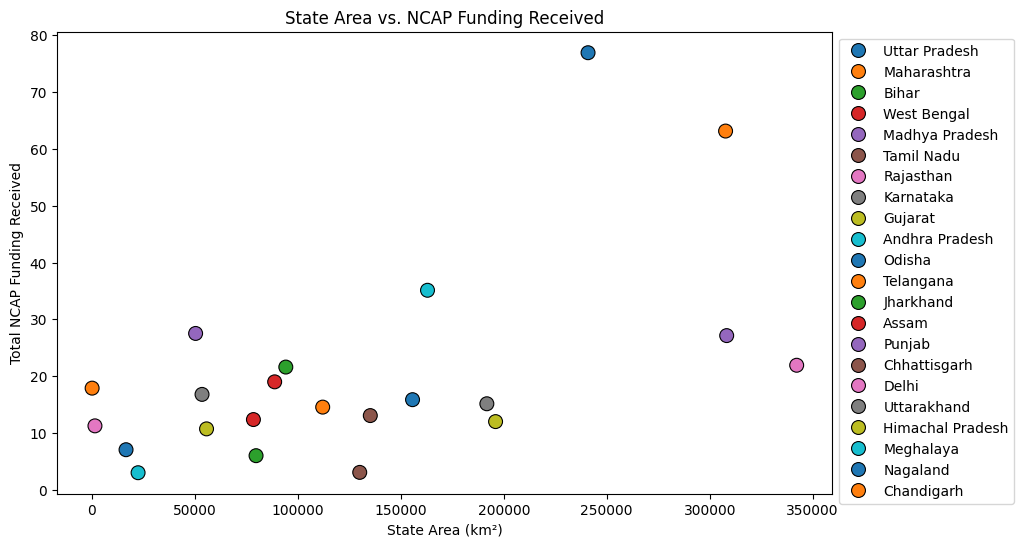

In [21]:
#question 3
ncap_funding["Total fund released"] = pd.to_numeric(ncap_funding["Total fund released"], errors='coerce')
state_funding = ncap_funding.groupby("State", as_index=False)["Total fund released"].sum()
state_funding = state_data.merge(state_funding, on="State", how="left")
state_funding.dropna(subset=["Total fund released"], inplace=True)
plt.figure(figsize=(10,6))
sns.scatterplot(x=state_funding['Area (km2)'], y=state_funding['Total fund released'], hue=state_funding['State'], palette='tab10', s=100, edgecolor='black')

plt.xlabel("State Area (km²)")
plt.ylabel("Total NCAP Funding Received")
plt.title("State Area vs. NCAP Funding Received")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

**Miscellaneous Questions**

In [22]:
#question 1
data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')
data_2023 = data[data['Timestamp'].dt.year == 2023]
most_polluted_city = data_2023.groupby('city')['PM2.5'].mean().idxmax()
most_polluted_city_data = data_2023[data_2023['city'] == most_polluted_city]
data_2023['Date'] = data_2023['Timestamp'].dt.date
hazardous_days_count = (data_2023.groupby('Date')['PM2.5'].max() > 300).sum()

print(f"Most polluted city in 2023: {most_polluted_city}")
print(f"Number of hazardous days in 2023 (PM2.5 > 300 µg/m³): {hazardous_days_count}")

Most polluted city in 2023: Darbhanga
Number of hazardous days in 2023 (PM2.5 > 300 µg/m³): 152


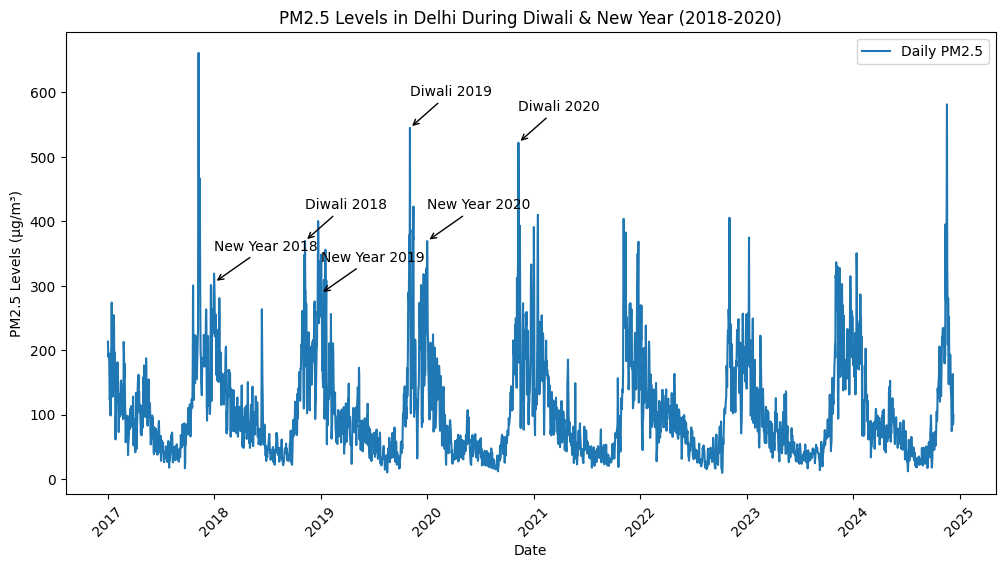

In [23]:
#question 2
data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')
delhi_data = data[data['city'] == 'Delhi']

delhi_data['Year'] = delhi_data['Timestamp'].dt.year
delhi_data['Month'] = delhi_data['Timestamp'].dt.month
delhi_data['Day'] = delhi_data['Timestamp'].dt.day

diwali_months = [10, 11]
new_year_days = [(1, 1)] 

delhi_data['Date'] = delhi_data['Timestamp'].dt.date
daily_pm25 = delhi_data.groupby(['Date'])['PM2.5'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='PM2.5', data=daily_pm25, label='Daily PM2.5')

for year in [2018, 2019, 2020]:
    diwali_spike = delhi_data[(delhi_data['Year'] == year) & (delhi_data['Month'].isin(diwali_months))]
    new_year_spike = delhi_data[(delhi_data['Year'] == year) & (delhi_data['Month'] == 1) & (delhi_data['Day'] == 1)]
    
    if not diwali_spike.empty:
        max_diwali_pm25 = diwali_spike.groupby('Date')['PM2.5'].mean().idxmax()
        max_diwali_value = diwali_spike.groupby('Date')['PM2.5'].mean().max()
        plt.annotate(f'Diwali {year}', xy=(max_diwali_pm25, max_diwali_value),
                     xytext=(max_diwali_pm25, max_diwali_value + 50),
                     arrowprops=dict(facecolor='red', arrowstyle='->'))
    
    if not new_year_spike.empty:
        max_new_year_pm25 = new_year_spike.groupby('Date')['PM2.5'].mean().idxmax()
        max_new_year_value = new_year_spike.groupby('Date')['PM2.5'].mean().max()
        plt.annotate(f'New Year {year}', xy=(max_new_year_pm25, max_new_year_value),
                     xytext=(max_new_year_pm25, max_new_year_value + 50),
                     arrowprops=dict(facecolor='blue', arrowstyle='->'))

plt.xlabel("Date")
plt.ylabel("PM2.5 Levels (µg/m³)")
plt.title("PM2.5 Levels in Delhi During Diwali & New Year (2018-2020)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

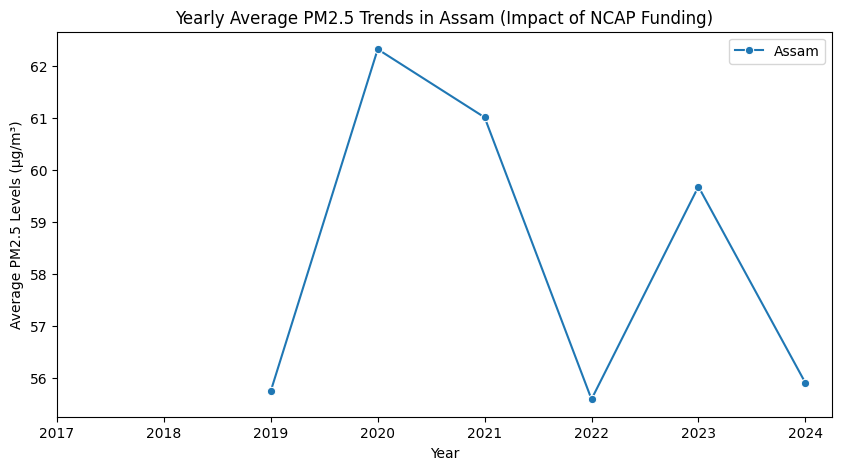

In [24]:
#question 3
data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')

ncap_funding['Total_Funding_2020'] = ncap_funding['Amount released during FY 2020-21']
highest_funded_state = ncap_funding.loc[ncap_funding['Total_Funding_2020'].idxmax(), 'State']

state_data_filtered = data[data['state'] == highest_funded_state]

state_data_filtered['Year'] = state_data_filtered['Timestamp'].dt.year
yearly_pm25 = state_data_filtered.groupby('Year')['PM2.5'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x='Year', y='PM2.5', data=yearly_pm25, marker='o', label=highest_funded_state)

plt.xlabel("Year")
plt.ylabel("Average PM2.5 Levels (µg/m³)")
plt.title(f"Yearly Average PM2.5 Trends in {highest_funded_state} (Impact of NCAP Funding)")
plt.xticks(yearly_pm25['Year'])
plt.legend()
plt.show()

In [25]:
import geopandas as gpd
data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')
india = gpd.read_file("ne_110m_admin_1_states_provinces.shp")

sensor_locations = data[['latitude', 'longitude']].dropna()

fig, ax = plt.subplots(figsize=(10, 10))
india.plot(ax=ax, color='lightgrey', edgecolor='black')
plt.scatter(sensor_locations['longitude'], sensor_locations['latitude'], c='red', s=10, label='Sensor Locations')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Sensor Locations on India Map")
plt.legend()
plt.show()

KeyboardInterrupt: 

In [ ]:
# I was not aware of the fact that pollution rates depend upon seasonal changes in some areas,
# while others showed consistent pollution levels throughout the year, 
#this has to do with temperature variations and the geographical location of these areas.
